<H1><span style="color:#00008B">ASSIGNMENT 2: NATURAL DISASTERS DATASET</span></H1>

### Muhammad Raisul Alam



In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import spacy
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from tensorflow.keras.layers import Embedding

In [446]:
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', 150)

random_state = 33

In [447]:
#!python -m spacy download en_core_web_sm

In [448]:
nlp = spacy.load('en_core_web_sm')

### Data Exploration

In [455]:
df_all_data = pd.read_csv('train.csv')

In [456]:
df_all_data.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [457]:
df_all_data.tail(50)

,id,keyword,location,text,target
7563,10812,wrecked,NaN,I wrecked my stomach help,0
7564,10813,wrecked,NaN,@__ohhmyjoshh @stevenrulles he not gonna be thinking that when he gets his shit wrecked on the first day of school ??,0
7565,10814,wrecked,NaN,Wrecked tired but not gonna be asleep before 3??,0
7566,10815,wrecked,United States,http://t.co/qVx0VQTPz0 Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/vuWBSrSnrY,0
7567,10817,wrecked,At your back,Wrecked emotions.,0
7568,10818,wrecked,NaN,The Riddler would be the best early-exit primary presidential wannabe ever all certain of his chances until he gets wrecked by a rich guy,0
7569,10819,wrecked,"Livingston, MT",@marynmck That's beyond adorable. I hope it won't be wrecked now that it's been noticed ...,0
7570,10821,wrecked,California,Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/3G79prAyYc #cnbc #topnews,0
7571,10822,wrecked,Glasgow,@Caitsroberts see U the night wee bArra to get absolutely wrecked ????,0
7572,10823,wrecked,"Manhattan, NY",@Kirafrog @mount_wario Did you get wrecked again?,1


In [458]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [453]:
df_all_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [459]:
df_all_data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
harm                     41
body%20bags              41
outbreak                 40
evacuate                 40
fear                     40
collided                 40
siren                    40
twister                  40
windstorm                40
sinkhole                 39
sunk                     39
hellfire                 39
weapon                   39
weapons                  39
famine                   39
explosion                39
whirlwind                39
earthquake               39
derailment               39
wreckage                 39
collision                39
flames                   39
wrecked                  39
oil%20spill              38
flooding                 38
deaths                   38
derailed                 38
thunder                  38
ambulance                38
drowned                  38
explode             

In [460]:
df_all_data['location'].value_counts()

USA                                                  104
New York                                              71
United States                                         50
London                                                45
Canada                                                29
Nigeria                                               28
UK                                                    27
Los Angeles, CA                                       26
India                                                 24
Mumbai                                                22
Washington, DC                                        21
Kenya                                                 20
Worldwide                                             19
Australia                                             18
Chicago, IL                                           18
California                                            17
Everywhere                                            15
New York, NY                   

### Data Cleaning 

In [461]:
def clean_text(text):
    
    if pd.isnull(text):
        return ''
    
    # remove_URL
    url = re.compile(r'https?://\S+|www\.\S+')
    text =  url.sub(r'', text)

    # remove_html
    html = re.compile(r'<.*?>')
    text = html.sub(r'', text)
    
    # remove character references (e.g., &lt;, &amp;, &nbsp;)
    text = re.sub(r'&[a-zA-Z]+;?', '', text)
    
    # remove mentions
    text = re.sub(r'@\w+', '', text)

    # remove_emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # remove_punct
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)
    
    # remove non printable 
    text = ''.join([word for word in text if word in string.printable])
    
    # remove numbers
    text = re.sub(r'\w*\d+\w*', '', text)

    return text

In [462]:
# clean keyword column
df_all_data['keyword'] = df_all_data['keyword'].str.replace('%20','')

# clean location column
df_all_data['location'] = df_all_data['location'].apply(lambda x: clean_text(x))

# clean text column
df_all_data['text'] = df_all_data['text'].apply(lambda x: clean_text(x))


In [463]:
# drop id column
df_all_data = df_all_data.drop(['id'], axis=1)


In [467]:
df_all_data.head(25)

,keyword,location,text,target
0,NaN,,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,1
1,NaN,,Forest fire near La Ronge Sask Canada,1
2,NaN,,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected,1
3,NaN,,people receive wildfires evacuation orders in California,1
4,NaN,,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1
5,NaN,,RockyFire Update California Hwy closed in both directions due to Lake County fire CAfire wildfires,1
6,NaN,,flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas,1
7,NaN,,Im on top of the hill and I can see a fire in the woods,1
8,NaN,,Theres an emergency evacuation happening now in the building across the street,1
9,NaN,,Im afraid that the tornado is coming to our area,1


In [466]:
df_all_data.head(25)

,keyword,location,text,target
0,NaN,,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,1
1,NaN,,Forest fire near La Ronge Sask Canada,1
2,NaN,,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected,1
3,NaN,,people receive wildfires evacuation orders in California,1
4,NaN,,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,1
5,NaN,,RockyFire Update California Hwy closed in both directions due to Lake County fire CAfire wildfires,1
6,NaN,,flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas,1
7,NaN,,Im on top of the hill and I can see a fire in the woods,1
8,NaN,,Theres an emergency evacuation happening now in the building across the street,1
9,NaN,,Im afraid that the tornado is coming to our area,1


### Find corelation between features and target - Chi-Square test

In [234]:
# Cross tabulation between location and target
cross_tabulation = pd.crosstab(index=df_all_data['keyword'],columns=df_all_data['target'])

# Perform Chi-sq test
chi_sq_test = chi2_contingency(cross_tabulation)

print('The P-Value of the Chi Sq Test is:', chi_sq_test[1])

The P-Value of the Chi Sq Test is: 0.0


<h4><span style="color:#A52A2A">In our statistical result, p-value is less than 0.05. We can reject the null hypothesis and conclude there is a relationship between location and disaster.</span><h4> 

In [235]:
# Cross tabulation between location and target
cross_tabulation = pd.crosstab(index=df_all_data['location'],columns=df_all_data['target'])

# Perform Chi-sq test
chi_sq_test = chi2_contingency(cross_tabulation)

print('The P-Value of the Chi Sq Test is:', chi_sq_test[1])

The P-Value of the Chi Sq Test is: 0.009051983292587763


<h4><span style="color:#A52A2A">In our statistical result, p-value is less than 0.05. We can reject the null hypothesis and conclude there is a relationship between location and disaster.</span><h4> 
     

### Text Data Preprocessing

In [468]:
def preprocessing(text):
    
    # make lower case 
    text = text.lower()
    
    # remove repeated characters in elongated words
    elongated = re.compile(r'(\S*?)([a-z])\2{2,}')
    text = elongated.sub(r'\1\2', text)
    
    # lemmatize the text
    text = ' '.join([t.lemma_ for t in nlp(text)])
    
    # remove stop words
    stopwords = nlp.Defaults.stop_words
    text = ' '.join([token for token in text.split() if token not in stopwords])
    
    return text

In [469]:
df_all_data['text'] = df_all_data['text'].apply(lambda x : preprocessing(x))


In [470]:
df_all_data = df_all_data.fillna('')
df_all_data['combined_features'] = df_all_data['keyword'] + " " + df_all_data['location'] + " " + df_all_data['text']


In [471]:
df_all_data = df_all_data.drop(['location', 'keyword', 'text'], axis = 1)

In [472]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   target             7613 non-null   int64 
 1   combined_features  7613 non-null   object
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [473]:
df_all_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<h4><span style="color:#A52A2A">As shown above, Dataset is not imbalanced. However, we have a less data for disaster. Our models may show bias towards "not disaster". In this case, we can use weighted models, over or under sampling, one-class classifier to fix this issue.</span><h4> 
    
<h4><span style="color:#A52A2A">The data cleaning and preprocessing can be further improved by checking spelling, elaborating the abbreviation, etc. </span><h4> 

<H1><span style="color:#00008B">TASK 1 - Bag of words model</span></H1>



In [476]:
df_bow = df_all_data.copy(deep = 'True')


clf_cv = CountVectorizer()
X = clf_cv.fit_transform(df_bow.combined_features)
y = df_bow.iloc[:, 0].values

In [477]:
print(cv.get_feature_names_out()[0:20])
print(cv.get_feature_names_out()[-20:])

X.shape 
cv.vocabulary_

['aa' 'aan' 'aand' 'aar' 'aarhus' 'aas' 'aashiqui' 'ab' 'aba' 'abandon'
 'abbandone' 'abbott' 'abbruchsimulator' 'abbswinston' 'abc' 'abcnews'
 'abe' 'aberdeen' 'aberdeenshire' 'aberystwythshrewsbury']
['zionism' 'zionist' 'zip' 'ziphimup' 'zippednew' 'zipper' 'zippoline'
 'ziuw' 'zmne' 'zodiac' 'zombie' 'zone' 'zonesthank' 'zoom' 'zouma' 'zrnf'
 'zss' 'zuidholland' 'zumiez' 'zurich']


{'deed': 3013,
 'reason': 10027,
 'earthquake': 3626,
 'allah': 296,
 'forgive': 4535,
 'forest': 4525,
 'fire': 4367,
 'near': 8279,
 'la': 6770,
 'ronge': 10462,
 'sask': 10689,
 'canada': 1801,
 'resident': 10239,
 'ask': 656,
 'shelter': 11002,
 'place': 9364,
 'notify': 8517,
 'officer': 8666,
 'evacuation': 3997,
 'order': 8819,
 'expect': 4077,
 'people': 9191,
 'receive': 10042,
 'wildfire': 13521,
 'california': 1762,
 'got': 5020,
 'send': 10869,
 'photo': 9279,
 'ruby': 10538,
 'alaska': 258,
 'smoke': 11294,
 'pour': 9540,
 'school': 10750,
 'rockyfire': 10429,
 'update': 12923,
 'hwy': 5785,
 'close': 2273,
 'direction': 3268,
 'lake': 6796,
 'county': 2654,
 'cafire': 1738,
 'flood': 4444,
 'disaster': 3284,
 'heavy': 5431,
 'rain': 9927,
 'cause': 1947,
 'flash': 4414,
 'flooding': 4446,
 'street': 11725,
 'manitou': 7426,
 'colorado': 2390,
 'spring': 11535,
 'area': 559,
 'hill': 5532,
 'wood': 13634,
 'emergency': 3785,
 'happen': 5293,
 'building': 1629,
 'afraid': 1

### Splitting Into Train and Test Data¶


In [482]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6090, 13931) (1523, 13931) (6090,) (1523,)


<h4><span style="color:#A52A2A">We have more features than the data samples  </span><h4> 

In [485]:
# create a dictionary containing the names and code of algorithms
clfs = {'mnb': MultinomialNB(), 
        'svc': SVC(random_state=random_state), 
        'lr':  LogisticRegression(max_iter=10000, random_state=random_state), 
        'dtc': DecisionTreeClassifier(random_state=random_state),
        'knc': KNeighborsClassifier(n_jobs=-1), 
        'rfc': RandomForestClassifier(random_state=random_state, n_jobs=-1), 
        'gbc': GradientBoostingClassifier(random_state=random_state)}

In [486]:
# create a function that builds and runs multiple classification models
def classify(clf, X_train, X_test, y_train, y_test):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    precision = precision_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = clf.score(X_train, y_train)
    return precision, fscore, recall, test_accuracy, train_accuracy

In [487]:
# create lists to store scores to build a dataframe later on
precision_series = []
fscore_series = []
recall_series = []
train_accuracy_series = []
test_accuracy_series = []

# run the models with classify() function we created above (this takes some time)
for name, clf in clfs.items():
    i_precision, i_fscore, i_recall, i_test_accuracy, i_train_accuracy = classify(clf, X_train, X_test, y_train, y_test)
    
    # append the scores to the lists
    precision_series.append(i_precision)
    fscore_series.append(i_fscore)
    recall_series.append(i_recall)
    test_accuracy_series.append(i_test_accuracy)
    train_accuracy_series.append(i_train_accuracy)
    
    # fit and predict
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    # print out the scores and classification reports
    print('[{}]\nPrecision: {} | F1-score: {} | Recall: {} | Test Accuracy: {} | Train Accuracy: {} \n'.format(name,
                                                                                                 round(i_precision, 2),
                                                                                                 round(i_fscore, 2),
                                                                                                 round(i_recall, 2),
                                                                                                 round(i_test_accuracy, 2),
                                                                                                 round(i_train_accuracy, 2)))
    #print(classification_report(y_test, y_pred))

[mnb]
Precision: 0.76 | F1-score: 0.74 | Recall: 0.72 | Test Accuracy: 0.78 | Train Accuracy: 0.9 

[svc]
Precision: 0.84 | F1-score: 0.72 | Recall: 0.63 | Test Accuracy: 0.78 | Train Accuracy: 0.95 

[lr]
Precision: 0.81 | F1-score: 0.73 | Recall: 0.66 | Test Accuracy: 0.78 | Train Accuracy: 0.96 

[dtc]
Precision: 0.74 | F1-score: 0.71 | Recall: 0.68 | Test Accuracy: 0.75 | Train Accuracy: 0.99 



C:\Users\Raisul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Raisul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

[knc]
Precision: 0.88 | F1-score: 0.5 | Recall: 0.35 | Test Accuracy: 0.69 | Train Accuracy: 0.77 

[rfc]
Precision: 0.82 | F1-score: 0.7 | Recall: 0.61 | Test Accuracy: 0.77 | Train Accuracy: 0.99 

[gbc]
Precision: 0.88 | F1-score: 0.6 | Recall: 0.46 | Test Accuracy: 0.73 | Train Accuracy: 0.77 



In [490]:
# create a dataframe with the scores
scores_df = pd.DataFrame({'Algorithm': clfs.keys(),
                          'Precision': precision_series,
                          'F1 Score': fscore_series,
                          'recall' : recall_series,
                          'Train Accuracy': train_accuracy_series,
                          'Test Accuracy': test_accuracy_series}).round(2).sort_values('Test Accuracy', ascending=False)
# check the dataframe
scores_df

,Algorithm,Precision,F1 Score,recall,Train Accuracy,Test Accuracy
0,mnb,0.76,0.74,0.72,0.90,0.78
1,svc,0.84,0.72,0.63,0.95,0.78
2,lr,0.81,0.73,0.66,0.96,0.78
5,rfc,0.82,0.70,0.61,0.99,0.77
3,dtc,0.74,0.71,0.68,0.99,0.75
6,gbc,0.88,0.60,0.46,0.77,0.73
4,knc,0.88,0.50,0.35,0.77,0.69


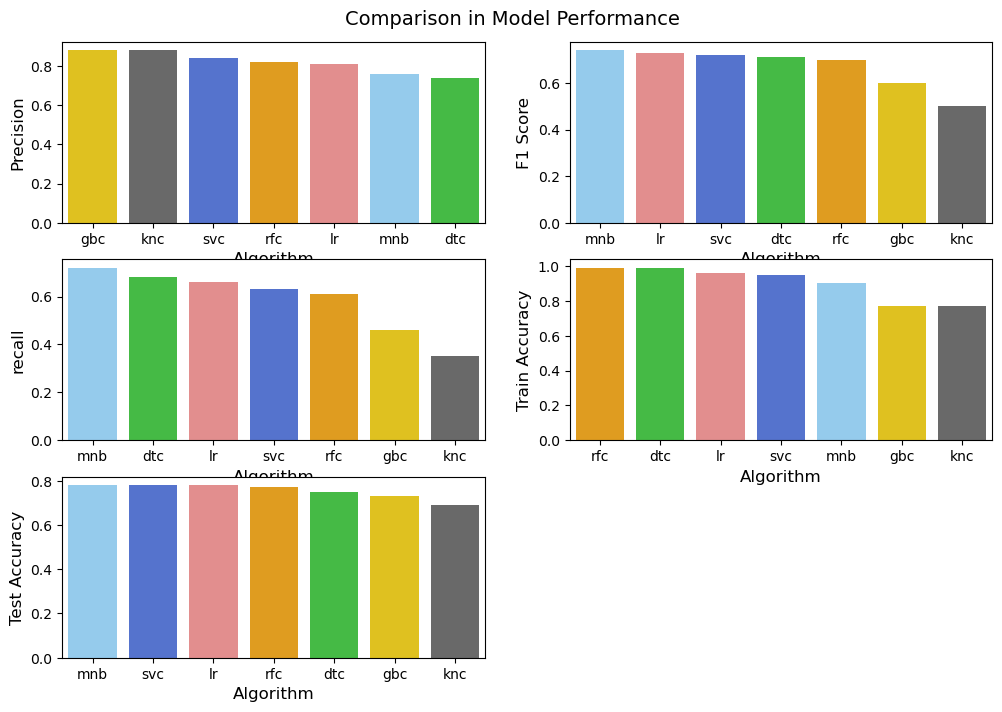

In [496]:
# create a list of metrics
metrics = ['Precision', 'F1 Score', 'recall', 'Train Accuracy', 'Test Accuracy']

# create the figure
fig = plt.figure(figsize=(12, 8))

# adjust the height of the padding between subplots to avoid overlapping
#plt.subplots_adjust(hspace=0.3)

# set the color palette
colors = {'lr':'lightcoral',
          'mnb':'lightskyblue',
          'rfc':'orange',
          'gbc':'gold',
          'dtc':'limegreen',
          'svc':'royalblue',
          'knc':'dimgray'}

# add a centered suptitle to the figure
plt.suptitle('Comparison in Model Performance', fontsize=14, y=0.92)

# generate the histograms in a for loop
for i, metric in enumerate(metrics):
    
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i+1)
    ax = sns.barplot(x='Algorithm', y=metric, data=scores_df.sort_values(metric, ascending=False), palette=colors)
    
    # set x_label, y_label
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    
# show the plots
plt.show()

## TASK 2 - Feature generation and traditional ML model

In [535]:
cv = TfidfVectorizer()
X = cv.fit_transform(df_all_data.combined_features)
y = df_all_data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6090, 13931) (1523, 13931) (6090,) (1523,)


In [536]:
print((y_test == 1).sum(), (y_test == 0).sum())

676 847


In [537]:
# create lists to store scores to build a dataframe later on
precision_series = []
fscore_series = []
recall_series = []
train_accuracy_series = []
test_accuracy_series = []

# run the models with classify() function we created above (this takes some time)
for name, clf in clfs.items():
    i_precision, i_fscore, i_recall, i_test_accuracy, i_train_accuracy = classify(clf, X_train, X_test, y_train, y_test)
    
    # append the scores to the lists
    precision_series.append(i_precision)
    fscore_series.append(i_fscore)
    recall_series.append(i_recall)
    test_accuracy_series.append(i_test_accuracy)
    train_accuracy_series.append(i_train_accuracy)
    
    # fit and predict
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    # print out the scores and classification reports
    print('[{}]\nPrecision: {} | F1-score: {} | Recall: {} | Test Accuracy: {} | Train Accuracy: {} \n'.format(name,
                                                                                                 round(i_precision, 2),
                                                                                                 round(i_fscore, 2),
                                                                                                 round(i_recall, 2),
                                                                                                 round(i_test_accuracy, 2),
                                                                                                 round(i_train_accuracy, 2)))


[mnb]
Precision: 0.84 | F1-score: 0.72 | Recall: 0.64 | Test Accuracy: 0.78 | Train Accuracy: 0.89 

[svc]
Precision: 0.86 | F1-score: 0.71 | Recall: 0.61 | Test Accuracy: 0.78 | Train Accuracy: 0.96 

[lr]
Precision: 0.85 | F1-score: 0.72 | Recall: 0.62 | Test Accuracy: 0.78 | Train Accuracy: 0.88 

[dtc]
Precision: 0.7 | F1-score: 0.68 | Recall: 0.66 | Test Accuracy: 0.73 | Train Accuracy: 0.99 



C:\Users\Raisul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Raisul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

[knc]
Precision: 0.76 | F1-score: 0.68 | Recall: 0.62 | Test Accuracy: 0.75 | Train Accuracy: 0.83 

[rfc]
Precision: 0.84 | F1-score: 0.71 | Recall: 0.62 | Test Accuracy: 0.78 | Train Accuracy: 0.99 

[gbc]
Precision: 0.88 | F1-score: 0.59 | Recall: 0.44 | Test Accuracy: 0.72 | Train Accuracy: 0.78 



In [540]:
# create a dataframe with the scores
scores_df = pd.DataFrame({'Algorithm': clfs.keys(),
                          'Precision': precision_series,
                          'F1 Score': fscore_series,
                          'recall' : recall_series,
                          'Train Accuracy': train_accuracy_series,
                          'Test Accuracy': test_accuracy_series}).round(2).sort_values('Test Accuracy', ascending=False)
# check the dataframe
scores_df

,Algorithm,Precision,F1 Score,recall,Train Accuracy,Test Accuracy
0,mnb,0.84,0.72,0.64,0.89,0.78
1,svc,0.86,0.71,0.61,0.96,0.78
2,lr,0.85,0.72,0.62,0.88,0.78
5,rfc,0.84,0.71,0.62,0.99,0.78
4,knc,0.76,0.68,0.62,0.83,0.75
3,dtc,0.70,0.68,0.66,0.99,0.73
6,gbc,0.88,0.59,0.44,0.78,0.72


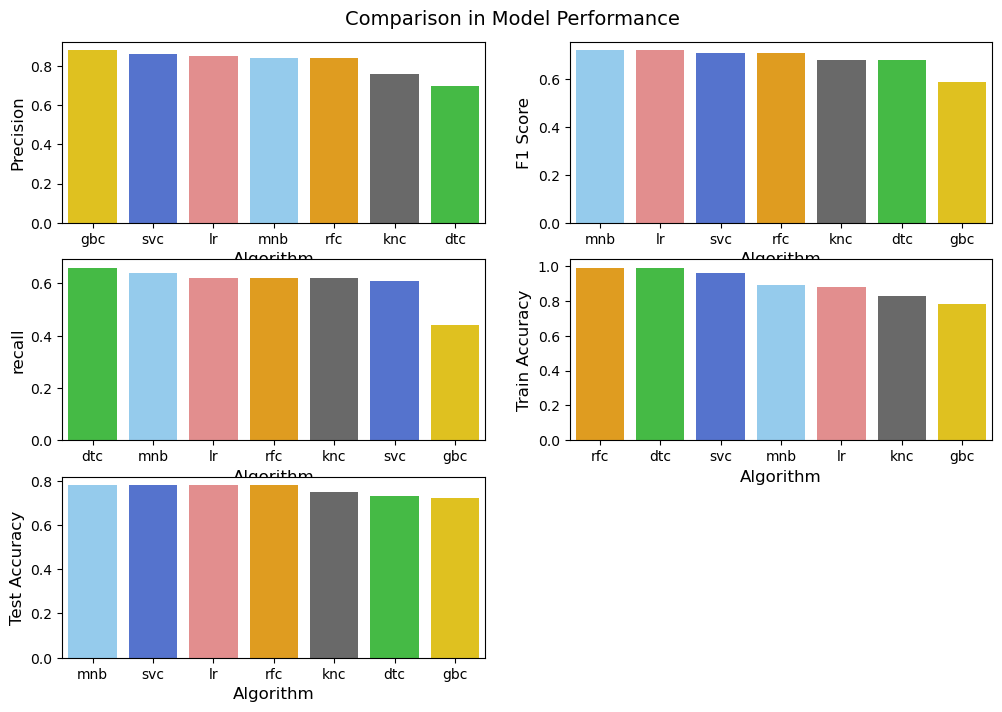

In [539]:
# create a list of metrics
metrics = ['Precision', 'F1 Score', 'recall', 'Train Accuracy', 'Test Accuracy']

# create the figure
fig = plt.figure(figsize=(12, 8))

# adjust the height of the padding between subplots to avoid overlapping
#plt.subplots_adjust(hspace=0.3)

# set the color palette
colors = {'lr':'lightcoral',
          'mnb':'lightskyblue',
          'rfc':'orange',
          'gbc':'gold',
          'dtc':'limegreen',
          'svc':'royalblue',
          'knc':'dimgray'}

# add a centered suptitle to the figure
plt.suptitle('Comparison in Model Performance', fontsize=14, y=0.92)

# generate the histograms in a for loop
for i, metric in enumerate(metrics):
    
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i+1)
    ax = sns.barplot(x='Algorithm', y=metric, data=scores_df.sort_values(metric, ascending=False), palette=colors)
    
    # set x_label, y_label
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    
# show the plots
plt.show()

## TASK 3 - Pre-trained word embeddings + linear classifier model

### Preprocessing for Glove

In [541]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.linear_model import SGDClassifier

In [542]:
# Get the cleaned and preprossed data
df_glove = df_all_data.copy(deep = True)

# find the max number of words
maximum_length = df_glove['combined_features'].str.split("\\s+")

#print(maximum_length)
print("Max number of words = ", maximum_length.str.len().max())

# Set all input sequences to have the same length
maximun_length_of_input_sequence = 50


Max number of words =  25


In [543]:
# load the whole Glove embeddings into memory
## dataset url = https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt

embedding_dict = {}

# length of input vector is 100 because we are using 100 dimensional Glove embeddings
input_vector_dimension = 100

with open('glove.6B.100d.txt','r', encoding="utf8") as glove:
    for line in glove:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors
        
glove.close()



In [544]:
# Tokenize our inputs
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(df_glove.combined_features)

sequences = tokenizer_obj.texts_to_sequences(df_glove.combined_features)

# generate padded sequence 
tweet_pad = pad_sequences(sequences, 
                          maxlen = maximun_length_of_input_sequence,
                          truncating = 'post', 
                          padding = 'post')

In [545]:
word_index = tokenizer_obj.word_index
print('number of unique words: ', len(word_index))

number of unique words:  13956


In [546]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,100))

for word, i in tokenizer_obj.word_index.items():   
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [547]:
embedding_matrix.shape

(13957, 100)

In [548]:
# Train the Glove embedding with our data

from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(num_words, input_vector_dimension, weights = [embedding_matrix], trainable = False, input_length = maximun_length_of_input_sequence))
model.compile('adam', 'mse')

In [549]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 100)           1395700   
                                                                 
Total params: 1,395,700
Trainable params: 0
Non-trainable params: 1,395,700
_________________________________________________________________


In [550]:
df_glove_embedding = model.predict(tweet_pad)

238/238 [==============================] - 1s 2ms/step


In [551]:
df_glove_embedding.shape[0] , df_glove_embedding.shape[1] * df_glove_embedding.shape[2]

(7613, 5000)

In [552]:
df_glove_embedding = df_glove_embedding.reshape(df_glove_embedding.shape[0], (df_glove_embedding.shape[1]*temp.shape[2]))

In [553]:
df_glove_embedding.shape

(7613, 5000)

In [554]:
print(df_glove_embedding[0])

[ 0.48937 -0.44453 -0.36711 ...  0.       0.       0.     ]


### Splitting Into Train and Test Data


In [555]:
X = df_glove_embedding
y = df_glove.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6090, 5000) (1523, 5000) (6090,) (1523,)


### Classification Metrics

In [556]:
max_iteration = 1000 
clfs = {'clf_sdg_lr': SGDClassifier(loss="log", # Logistic Regression
                        penalty="l2", 
                        max_iter=max_iteration, 
                        early_stopping = True, 
                        random_state=random_state), 
        
        'clf_sdg_svm': SGDClassifier(loss='hinge', # Linear SVM
                                     penalty='l2', 
                                     max_iter=max_iteration, 
                                     early_stopping = True,
                                     random_state=random_state)}

In [557]:
# create lists to store scores to build a dataframe later on
precision_series = []
fscore_series = []
recall_series = []
test_accuracy_series = []
train_accuracy_series = []


# run the models with classify() function we created above (this takes some time)
for name, clf in clfs.items():
    i_precision, i_fscore, i_recall, i_test_accuracy, i_train_accuracy = classify(clf, X_train, X_test, y_train, y_test)
    
    # append the scores to the lists
    precision_series.append(i_precision)
    fscore_series.append(i_fscore)
    recall_series.append(i_recall)
    test_accuracy_series.append(i_test_accuracy)
    train_accuracy_series.append(i_train_accuracy)
    
    # fit and predict
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    # print out the scores and classification reports
    print('[{}]\nPrecision: {} | F1-score: {} | Recall: {} | Test Accuracy: {} | Train Accuracy: {} \n'.format(name,
                                                                                                 round(i_precision, 2),
                                                                                                 round(i_fscore, 2),
                                                                                                 round(i_recall, 2),
                                                                                                 round(i_test_accuracy, 2),
                                                                                                 round(i_train_accuracy, 2)))

[clf_sdg_lr]
Precision: 0.65 | F1-score: 0.69 | Recall: 0.73 | Test Accuracy: 0.7 | Train Accuracy: 0.81 

[clf_sdg_svm]
Precision: 0.67 | F1-score: 0.7 | Recall: 0.72 | Test Accuracy: 0.72 | Train Accuracy: 0.83 



In [558]:
# create a dataframe with the scores
scores_df = pd.DataFrame({'Algorithm': clfs.keys(),
                          'Precision': precision_series,
                          'F1 Score': fscore_series,
                          'recall' : recall_series,
                          'Train Accuracy': train_accuracy_series,
                          'Test Accuracy': test_accuracy_series}).round(2).sort_values('Test Accuracy', ascending=False)
# check the dataframe
scores_df

,Algorithm,Precision,F1 Score,recall,Train Accuracy,Test Accuracy
1,clf_sdg_svm,0.67,0.70,0.72,0.83,0.72
0,clf_sdg_lr,0.65,0.69,0.73,0.81,0.70


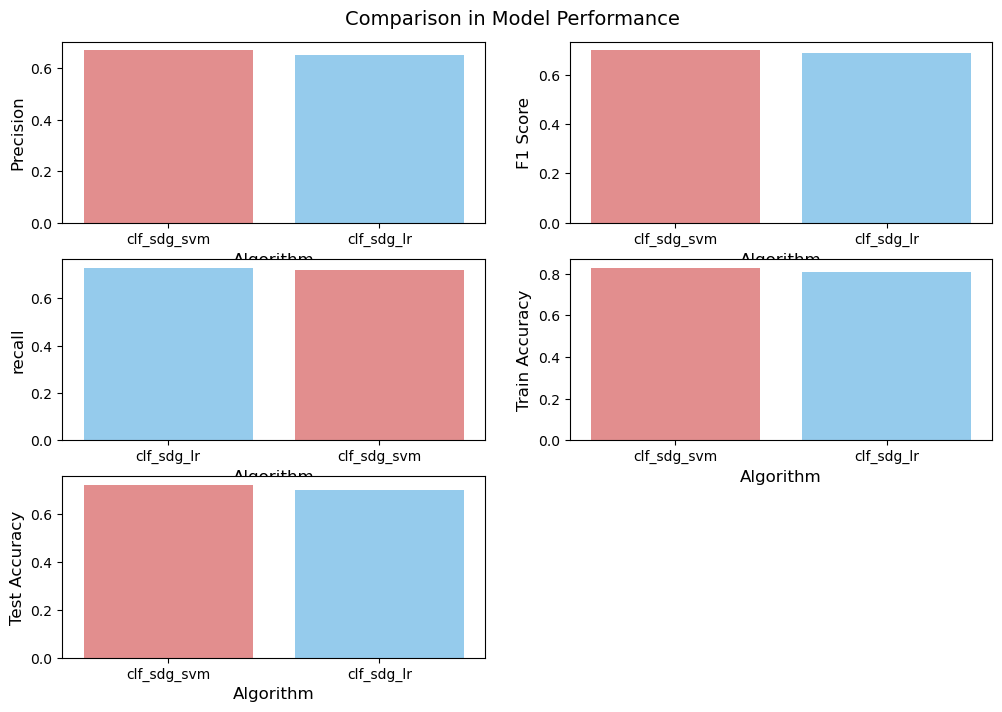

In [559]:
# create a list of metrics
metrics = ['Precision', 'F1 Score', 'recall', 'Train Accuracy', 'Test Accuracy']

# create the figure
fig = plt.figure(figsize=(12, 8))

# adjust the height of the padding between subplots to avoid overlapping
#plt.subplots_adjust(hspace=0.3)

# set the color palette
colors = {'clf_sdg_svm':'lightcoral',
          'clf_sdg_lr':'lightskyblue'}

# add a centered suptitle to the figure
plt.suptitle('Comparison in Model Performance', fontsize=14, y=0.92)

# generate the histograms in a for loop
for i, metric in enumerate(metrics):
    
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i+1)
    ax = sns.barplot(x='Algorithm', y=metric, data=scores_df.sort_values(metric, ascending=False), palette=colors)
    
    # set x_label, y_label
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    
# show the plots
plt.show()

## TASK 4 - Recommendations to the clients

From the figures in Task 1, Task 2 and Task 3, for this pertucular study, my results show that 

* The model trained with glove embeddings performs worst w.r.t test accuracy compared to others. Its precision is low but recall and f-score are compareble with others. Its trainning accuracies shows that it is not overfitted.

* The model trained with tf-idf embeddings performs similar to bag-of-words w.r.t test accuracy. Its recall is low but precision and f-score are compareble with others. Its trainning accuracies is very high which means it maybe overfitted.

* The model trained with bag-of-words embeddings performs similar to tf-idf w.r.t test accuracy. For   MultinomialNB() its recall, precision and f-score are higher. Its trainning accuracies is  high which means it maybe overfitted.


Therefore I would recommned Multinomial  Naive Bayes to my clients. It is also explanable using lime package. 